<a href="https://colab.research.google.com/github/masterinfo/COURS_ELEARNING/blob/master/associations_ruules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6 - Other Popular Machine Learning Methods
## Segment 1 - Association Rule Mining Using Apriori Algorithm

# Import the required libraries

In [2]:
! pip install mlxtend

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Format

In [5]:
address = '/content/drive/MyDrive/groceries.csv'
data = pd.read_csv(address)

In [6]:
data.head()

,1,2,3,4,5,6,7,8,9
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN


In [7]:
data.shape

(3090, 9)

3090 transactions avec au max 9 produits

# Data Conversion

What does Get_dummies do in pandas?
Convert categorical variable into dummy/indicator variables. Each variable is converted in as many 0/1 variables as there are different values. Columns in the output are each named after a value; if the input is a DataFrame, the name of the original variable is prepended to the value.

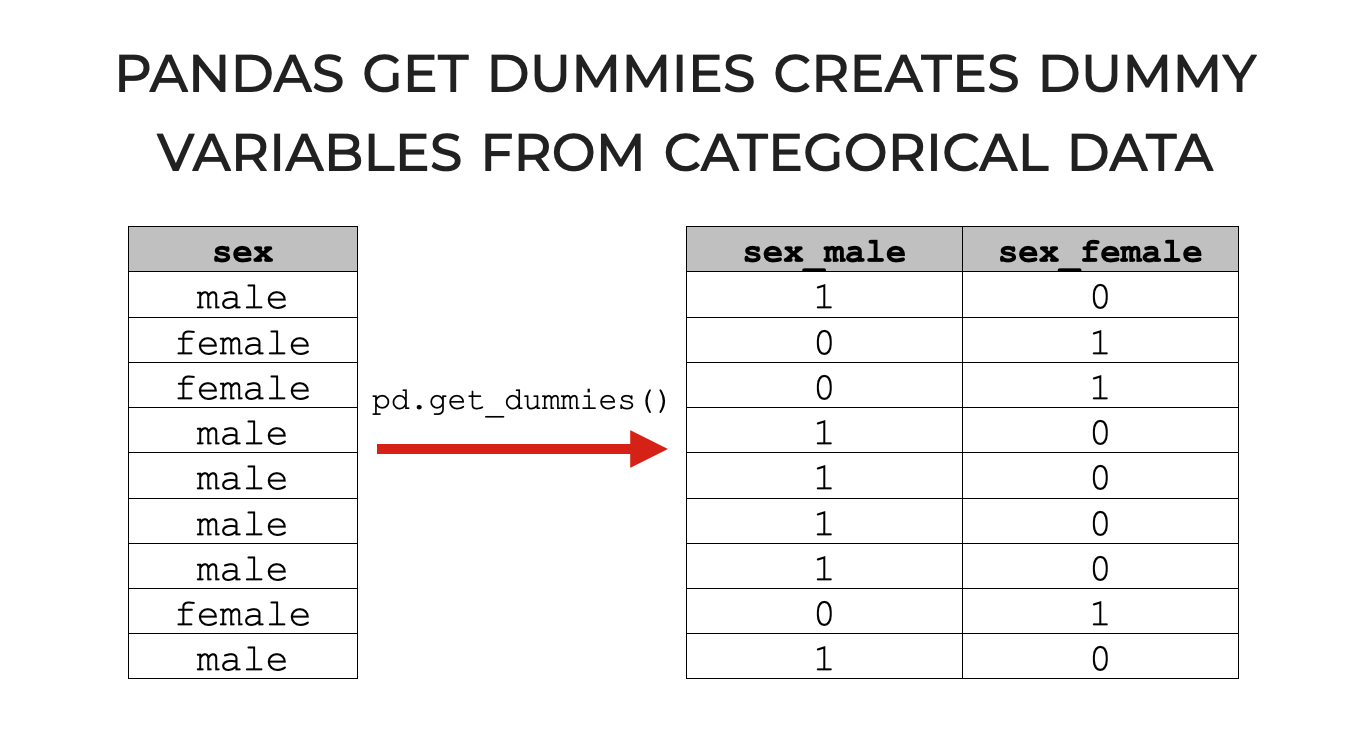

In [8]:
basket_sets = pd.get_dummies(data)

In [9]:
basket_sets.head()

,1_Instant food products,1_UHT-milk,1_artif. sweetener,1_baby cosmetics,1_bags,1_baking powder,1_bathroom cleaner,1_beef,1_berries,1_beverages,...,9_sweet spreads,9_tea,9_vinegar,9_waffles,9_whipped/sour cream,9_white bread,9_white wine,9_whole milk,9_yogurt,9_zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
basket_sets.shape

(3090, 1113)



---
How to fix the problem in pandas.get_dummies


In [11]:
basket_sets_ok=pd.get_dummies(data, prefix="", prefix_sep="").max(level=0, axis=1)
basket_sets_ok
# future warning use :::basket_sets_ok=pd.get_dummies(data, prefix="", prefix_sep="").groupby(level=0, axis=1).sum()

<ipython-input-11-cce6d2d130a3>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  basket_sets_ok=pd.get_dummies(data, prefix="", prefix_sep="").max(level=0, axis=1)


,Instant food products,UHT-milk,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,...,abrasive cleaner,ready soups,rubbing alcohol,cooking chocolate,liqueur,make up remover,toilet cleaner,syrup,whisky,specialty vegetables
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3086,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3087,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
print(basket_sets.iloc[:, 0:20].head(5))

   1_Instant food products  1_UHT-milk  1_artif. sweetener  1_baby cosmetics  \
0                        0           0                   0                 0   
1                        0           0                   0                 0   
2                        0           0                   0                 0   
3                        0           0                   0                 0   
4                        0           0                   0                 0   

   1_bags  1_baking powder  1_bathroom cleaner  1_beef  1_berries  \
0       0                0                   0       0          0   
1       0                0                   0       0          0   
2       0                0                   0       0          0   
3       0                0                   0       0          0   
4       0                0                   0       0          0   

   1_beverages  1_bottled beer  1_bottled water  1_brandy  1_brown bread  \
0            0              

In [13]:
print(basket_sets.columns[basket_sets.columns.str.contains('milk')])

Index(['1_UHT-milk', '1_butter milk', '1_condensed milk', '1_whole milk',
       '2_UHT-milk', '2_butter milk', '2_condensed milk', '2_whole milk',
       '3_UHT-milk', '3_butter milk', '3_condensed milk', '3_whole milk',
       '4_UHT-milk', '4_butter milk', '4_condensed milk', '4_whole milk',
       '5_UHT-milk', '5_butter milk', '5_condensed milk', '5_whole milk',
       '6_UHT-milk', '6_butter milk', '6_condensed milk', '6_whole milk',
       '7_UHT-milk', '7_butter milk', '7_whole milk', '8_UHT-milk',
       '8_butter milk', '8_whole milk', '9_butter milk', '9_whole milk'],
      dtype='object')


3090 transactions avec   1113 colonnes de produits => il y des doublons

In [14]:
basket_sets_ok.shape

(3090, 165)

le nb representz le nb de d'occurence et non le numéro de la colonne

# Support Calculation

Minimum-Support is a parameter supplied to the Apriori algorithm in order to prune candidate rules by specifying a minimum lower bound for the Support measure of resulting association rules.

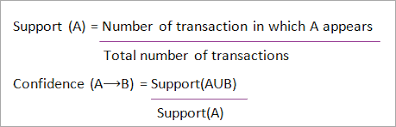

In [15]:
basket_sets[0:7]

,1_Instant food products,1_UHT-milk,1_artif. sweetener,1_baby cosmetics,1_bags,1_baking powder,1_bathroom cleaner,1_beef,1_berries,1_beverages,...,9_sweet spreads,9_tea,9_vinegar,9_waffles,9_whipped/sour cream,9_white bread,9_white wine,9_whole milk,9_yogurt,9_zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
basket_sets_ok[0:7]

,Instant food products,UHT-milk,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,...,abrasive cleaner,ready soups,rubbing alcohol,cooking chocolate,liqueur,make up remover,toilet cleaner,syrup,whisky,specialty vegetables
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
basket_sets_ok.shape

(3090, 165)

3090 transactions sur 165 produits differents

autre moyen de vérifier

In [18]:
product_list= data.values.ravel().tolist()
product_list

['citrus fruit',
 'semi-finished bread',
 'margarine',
 'ready soups',
 nan,
 nan,
 nan,
 nan,
 nan,
 'tropical fruit',
 'yogurt',
 'coffee',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'whole milk',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'pip fruit',
 'yogurt',
 'cream cheese ',
 'meat spreads',
 nan,
 nan,
 nan,
 nan,
 nan,
 'other vegetables',
 'whole milk',
 'condensed milk',
 'long life bakery product',
 nan,
 nan,
 nan,
 nan,
 nan,
 'whole milk',
 'butter',
 'yogurt',
 'rice',
 'abrasive cleaner',
 nan,
 nan,
 nan,
 nan,
 'rolls/buns',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'other vegetables',
 'UHT-milk',
 'rolls/buns',
 'bottled beer',
 'liquor (appetizer)',
 nan,
 nan,
 nan,
 nan,
 'pot plants',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'whole milk',
 'cereals',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'tropical fruit',
 'other vegetables',
 'white bread',
 'bottled water',
 'chocolate',
 nan,
 nan,
 nan,
 nan,
 'citrus fruit',
 'tropical fruit',
 'whole 

nombre de produit

In [19]:
unique_product_list = list(set(product_list))
# print(unique_product_list)
# print("**********************drop nan from list***********************************************")
unique_product_list = [x for x in unique_product_list if pd.isnull(x) == False]
print(len(unique_product_list))

165


In [20]:



print(len(unique_product_list))

print(f" il y a bien {len(unique_product_list)} produits différents dans le dataset")



165
 il y a bien 165 produits différents dans le dataset


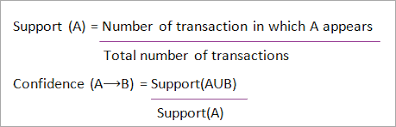

In [21]:
tab_support_item = {}
print("**********************count number occurences of item in data.values***********************************************")

for item in unique_product_list:
    # print(item)
    # print(" nb d'occurences donc de presence dans les transactions",data.values[data.values == item].shape[0])
    print(data.values[data.values == item].shape[0]/data.values.shape[0])
    support =round(data.values[data.values == item].shape[0]/data.values.shape[0],6)
    print(f"item {item} is in {data.values[data.values == item].shape[0]} transaction(s) donc Support({item})= {support} ")
    tab_support_item[item]=support
    print("-----------------------------")

**********************count number occurences of item in data.values***********************************************
0.02815533980582524
item UHT-milk is in 87 transaction(s) donc Support(UHT-milk)= 0.028155 
-----------------------------
0.016181229773462782
item pot plants is in 50 transaction(s) donc Support(pot plants)= 0.016181 
-----------------------------
0.016828478964401296
item white wine is in 52 transaction(s) donc Support(white wine)= 0.016828 
-----------------------------
0.0012944983818770227
item syrup is in 4 transaction(s) donc Support(syrup)= 0.001294 
-----------------------------
0.002912621359223301
item nuts/prunes is in 9 transaction(s) donc Support(nuts/prunes)= 0.002913 
-----------------------------
0.02750809061488673
item beverages is in 85 transaction(s) donc Support(beverages)= 0.027508 
-----------------------------
0.000970873786407767
item salad dressing is in 3 transaction(s) donc Support(salad dressing)= 0.000971 
-----------------------------
0.007

In [22]:
print("**********************ordering dict by value***********************************************")
tab_support_item = {k: v for k, v in sorted(tab_support_item.items(), key=lambda item: item[1],reverse=True)}
print(tab_support_item)

**********************orderin dict by value***********************************************
{'whole milk': 0.256634, 'rolls/buns': 0.194498, 'other vegetables': 0.192557, 'soda': 0.159223, 'yogurt': 0.136893, 'bottled water': 0.111974, 'root vegetables': 0.110032, 'tropical fruit': 0.098382, 'citrus fruit': 0.090615, 'sausage': 0.087379, 'shopping bags': 0.082848, 'pastry': 0.082848, 'canned beer': 0.077023, 'bottled beer': 0.072492, 'whipped/sour cream': 0.072492, 'pip fruit': 0.071197, 'frankfurter': 0.064401, 'newspapers': 0.064401, 'curd': 0.059871, 'pork': 0.058252, 'domestic eggs': 0.057929, 'margarine': 0.057282, 'coffee': 0.056958, 'fruit/vegetable juice': 0.055987, 'butter': 0.055663, 'brown bread': 0.054369, 'beef': 0.054369, 'frozen vegetables': 0.045307, 'dessert': 0.038835, 'cream cheese ': 0.037864, 'chicken': 0.036893, 'onions': 0.035922, 'white bread': 0.035922, 'napkins': 0.035922, 'hamburger meat': 0.033333, 'sugar': 0.032686, 'chocolate': 0.032039, 'berries': 0.032039



---



**--- cette partie n'est donc pas correcte--  **



In [23]:
apriori(basket_sets, min_support=0.02, use_colnames=True)

,support,itemsets
0,0.030421,(1_beef)
1,0.034951,(1_canned beer)
2,0.029126,(1_chicken)
3,0.049191,(1_citrus fruit)
4,0.064401,(1_frankfurter)
5,0.044660,(1_other vegetables)
6,0.024272,(1_pip fruit)
7,0.040453,(1_pork)
8,0.038835,(1_rolls/buns)
9,0.033981,(1_root vegetables)


In [24]:
apriori(basket_sets_ok, min_support=0.02, use_colnames=True)

,support,itemsets
0,0.028155,(UHT-milk)
1,0.054369,(beef)
2,0.032039,(berries)
3,0.027508,(beverages)
4,0.072492,(bottled beer)
...,...,...
105,0.022977,"(tropical fruit, yogurt)"
106,0.033981,"(whole milk, whipped/sour cream)"
107,0.055987,"(whole milk, yogurt)"
108,0.022977,"(other vegetables, whole milk, root vegetables)"


In [25]:
tab_support_item['UHT-milk']

0.028155

In [26]:
tab_support_item['bottled beer']

0.072492

In [27]:
tab_support_item['Instant food products']

0.00712



---



In [28]:
frequent_itemsets = apriori(basket_sets, min_support=0.002, use_colnames=True)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[:10 ]

,support,itemsets,length
0,0.006472,(1_UHT-milk),1
1,0.030421,(1_beef),1
2,0.011974,(1_berries),1
3,0.008414,(1_beverages),1
4,0.014887,(1_bottled beer),1
5,0.019094,(1_bottled water),1
6,0.006149,(1_brown bread),1
7,0.009385,(1_butter),1
8,0.004854,(1_butter milk),1
9,0.034951,(1_canned beer),1


pour moi celui ci est bon

In [29]:
frequent_itemsets_ok = apriori(basket_sets_ok, min_support=0.002, use_colnames=True)

frequent_itemsets_ok['length'] = frequent_itemsets_ok['itemsets'].apply(lambda x: len(x))
frequent_itemsets_ok

,support,itemsets,length
0,0.007120,(Instant food products),1
1,0.028155,(UHT-milk),1
2,0.003560,(artif. sweetener),1
3,0.014887,(baking powder),1
4,0.002265,(bathroom cleaner),1
...,...,...,...
2313,0.002265,"(citrus fruit, yogurt, root vegetables, whole ...",5
2314,0.002589,"(citrus fruit, yogurt, whipped/sour cream, who...",5
2315,0.002265,"(yogurt, whipped/sour cream, pip fruit, whole ...",5
2316,0.002265,"(yogurt, root vegetables, tropical fruit, whol...",5


In [30]:
tab_support_item['Instant food products']

0.00712



---



---



In [34]:
def get_frozenset_elements(frozen_set):
    for i in frozen_set:
        yield i


In [ ]:
for item in frequent_itemsets['itemsets']:
    print(item)


In [36]:
for item in frequent_itemsets_ok['itemsets'] :

     if 'UHT-milk'  in get_frozenset_elements(item) and len(item) == 1:


         print(frequent_itemsets_ok[frequent_itemsets_ok['itemsets'] == item])

    support    itemsets  length
1  0.028155  (UHT-milk)       1


In [37]:
import re
support_item=0
for item in frequent_itemsets['itemsets'] :

         if re.search(r'UHT-milk',str(item))  and len(item) == 1:
             print(frequent_itemsets[frequent_itemsets['itemsets'] == item])

             support_item+= frequent_itemsets['support'][frequent_itemsets['itemsets'] == item].values[0]
             print(support_item)


support_item

    support      itemsets  length
0  0.006472  (1_UHT-milk)       1
0.006472491909385114
     support      itemsets  length
64  0.006149  (2_UHT-milk)       1
0.01262135922330097
      support      itemsets  length
131  0.006472  (3_UHT-milk)       1
0.019093851132686083
      support      itemsets  length
195  0.003236  (4_UHT-milk)       1
0.02233009708737864
      support      itemsets  length
258  0.002913  (5_UHT-milk)       1
0.02524271844660194


0.02524271844660194



---



---



nous voyons que c'est pas correct l'ensemble correspond mais...



---



---



In [38]:
frequent_itemsets[frequent_itemsets['length'] >= 3]

,support,itemsets,length
820,0.002589,"(2_root vegetables, 1_beef, 3_other vegetables)",3
821,0.002589,"(2_other vegetables, 3_whole milk, 1_chicken)",3
822,0.002589,"(2_other vegetables, 3_whole milk, 1_citrus fr...",3
823,0.003236,"(1_citrus fruit, 3_pip fruit, 2_tropical fruit)",3
824,0.002589,"(3_other vegetables, 1_citrus fruit, 4_whole m...",3
825,0.002265,"(6_whole milk, 1_frankfurter, 5_other vegetables)",3
826,0.002265,"(3_other vegetables, 1_pork, 4_whole milk)",3
827,0.003560,"(2_other vegetables, 3_whole milk, 1_root vege...",3
828,0.002589,"(3_soda, 2_rolls/buns, 1_sausage)",3
829,0.002265,"(3_other vegetables, 4_whole milk, 1_sausage)",3


In [39]:
frequent_itemsets_ok[frequent_itemsets_ok['length'] >= 3]

,support,itemsets,length
1260,0.002589,"(other vegetables, UHT-milk, bottled water)",3
1261,0.002265,"(UHT-milk, bottled water, soda)",3
1262,0.002589,"(other vegetables, whole milk, baking powder)",3
1263,0.002265,"(whole milk, whipped/sour cream, baking powder)",3
1264,0.002589,"(beef, whole milk, berries)",3
...,...,...,...
2313,0.002265,"(citrus fruit, yogurt, root vegetables, whole ...",5
2314,0.002589,"(citrus fruit, yogurt, whipped/sour cream, who...",5
2315,0.002265,"(yogurt, whipped/sour cream, pip fruit, whole ...",5
2316,0.002265,"(yogurt, root vegetables, tropical fruit, whol...",5


In [40]:
frequent_itemsets_ok[frequent_itemsets_ok['length'] == 2]

,support,itemsets,length
138,0.002265,"(other vegetables, Instant food products)",2
139,0.002265,"(Instant food products, root vegetables)",2
140,0.006472,"(UHT-milk, bottled water)",2
141,0.002913,"(brown bread, UHT-milk)",2
142,0.002589,"(UHT-milk, canned beer)",2
...,...,...,...
1255,0.003560,"(cereals, whole milk)",2
1256,0.005178,"(dishes, whole milk)",2
1257,0.002589,"(whole milk, flower (seeds))",2
1258,0.002913,"(rice, whole milk)",2


In [41]:
frequent_itemsets_ok[frequent_itemsets_ok['length'] == 1]

,support,itemsets,length
0,0.007120,(Instant food products),1
1,0.028155,(UHT-milk),1
2,0.003560,(artif. sweetener),1
3,0.014887,(baking powder),1
4,0.002265,(bathroom cleaner),1
...,...,...,...
133,0.007120,(seasonal products),1
134,0.005178,(softener),1
135,0.003883,(tea),1
136,0.002589,(ketchup),1


In [42]:
tab_support_item['seasonal products']

0.00712



---



---



---



---



# Association Rules

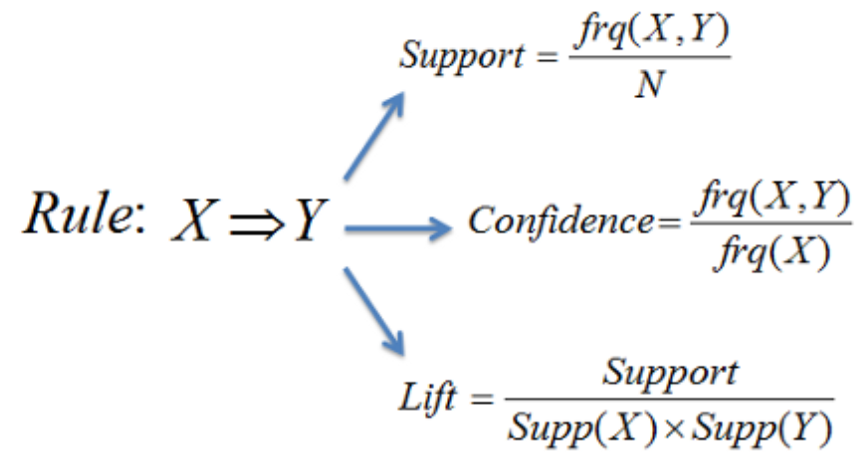

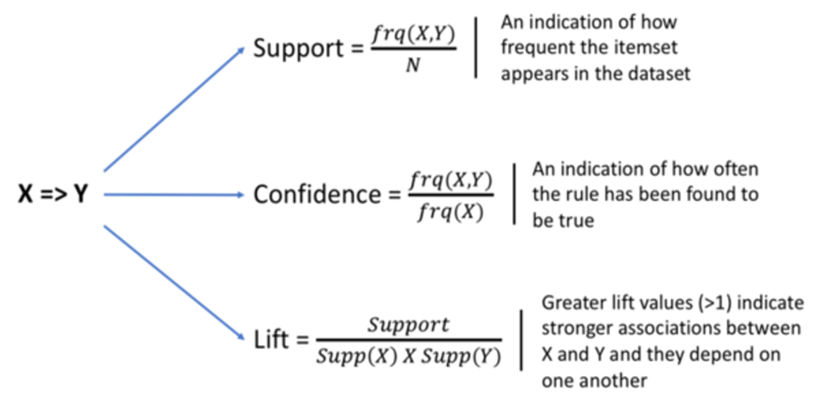

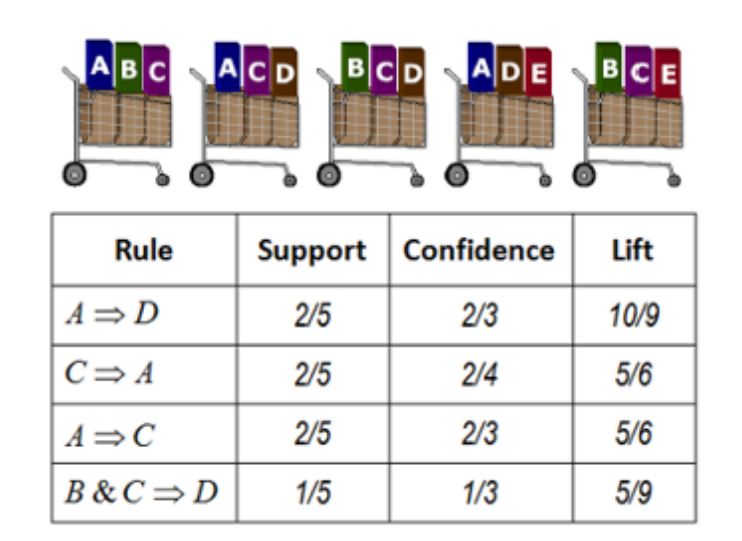

## Confidence

In [43]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2_sausage),(1_frankfurter),0.011327,0.064401,0.011327,1.000000,15.527638,0.010597,inf
1,(7_pastry),(1_frankfurter),0.005178,0.064401,0.002589,0.500000,7.763819,0.002256,1.871197
2,(2_ham),(1_sausage),0.007120,0.076052,0.004531,0.636364,8.367505,0.003989,2.540858
3,(2_meat),(1_sausage),0.006796,0.076052,0.004854,0.714286,9.392097,0.004338,3.233819
4,(3_beef),(1_sausage),0.004854,0.076052,0.002589,0.533333,7.012766,0.002220,1.979889


In [45]:
rules_ok = association_rules(frequent_itemsets_ok, metric="confidence", min_threshold=0.5)
rules_ok.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(baking powder),(whole milk),0.014887,0.256634,0.008414,0.565217,2.202423,0.004594,1.709741
1,(curd cheese),(other vegetables),0.003883,0.192557,0.002589,0.666667,3.462185,0.001841,2.422330
2,(frozen fish),(whole milk),0.009709,0.256634,0.004854,0.500000,1.948298,0.002363,1.486731
3,(soups),(whole milk),0.004207,0.256634,0.002265,0.538462,2.098167,0.001186,1.610626
4,(cereals),(whole milk),0.004207,0.256634,0.003560,0.846154,3.297119,0.002480,4.831877


ici on voit que le premier est completement  faux



---



## Lift

In [46]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1_beef),(2_citrus fruit),0.030421,0.028803,0.005502,0.180851,6.278986,0.004625,1.185618
1,(2_citrus fruit),(1_beef),0.028803,0.030421,0.005502,0.191011,6.278986,0.004625,1.198508
2,(2_other vegetables),(1_beef),0.058900,0.030421,0.003236,0.054945,1.806173,0.001444,1.025950
3,(1_beef),(2_other vegetables),0.030421,0.058900,0.003236,0.106383,1.806173,0.001444,1.053136
4,(2_root vegetables),(1_beef),0.036893,0.030421,0.005502,0.149123,4.902016,0.004379,1.139506


In [47]:
rules_ok = association_rules(frequent_itemsets_ok, metric="lift", min_threshold=1)
rules_ok.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(Instant food products),0.192557,0.007120,0.002265,0.011765,1.652406,0.000894,1.004700
1,(Instant food products),(other vegetables),0.007120,0.192557,0.002265,0.318182,1.652406,0.000894,1.184250
2,(Instant food products),(root vegetables),0.007120,0.110032,0.002265,0.318182,2.891711,0.001482,1.305286
3,(root vegetables),(Instant food products),0.110032,0.007120,0.002265,0.020588,2.891711,0.001482,1.013752
4,(UHT-milk),(bottled water),0.028155,0.111974,0.006472,0.229885,2.053020,0.003320,1.153108


## Lift and Confidence

In [48]:
rules[(rules['lift'] >= 5) & (rules['confidence']>= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
92,(2_sausage),(1_frankfurter),0.011327,0.064401,0.011327,1.000000,15.527638,0.010597,inf
136,(7_pastry),(1_frankfurter),0.005178,0.064401,0.002589,0.500000,7.763819,0.002256,1.871197
238,(2_ham),(1_sausage),0.007120,0.076052,0.004531,0.636364,8.367505,0.003989,2.540858
242,(2_meat),(1_sausage),0.006796,0.076052,0.004854,0.714286,9.392097,0.004338,3.233819
259,(3_beef),(1_sausage),0.004854,0.076052,0.002589,0.533333,7.012766,0.002220,1.979889
...,...,...,...,...,...,...,...,...,...
958,"(4_root vegetables, 5_other vegetables)",(6_whole milk),0.005178,0.009385,0.003236,0.625000,66.594828,0.003188,2.641640
959,"(4_root vegetables, 6_whole milk)",(5_other vegetables),0.003883,0.012621,0.003236,0.833333,66.025641,0.003187,5.924272
965,"(6_whole milk, 7_butter)",(5_other vegetables),0.002913,0.012621,0.002265,0.777778,61.623932,0.002229,4.443204
966,"(5_other vegetables, 7_butter)",(6_whole milk),0.002589,0.009385,0.002265,0.875000,93.232759,0.002241,7.924919


celui est correct

In [52]:
rules_ok[(rules_ok['lift'] >= 5) & (rules_ok['confidence']>= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1920,"(beef, onions)",(root vegetables),0.003883,0.110032,0.002265,0.583333,5.301471,0.001838,2.135922
2094,"(sausage, berries)",(citrus fruit),0.003883,0.090615,0.002265,0.583333,6.437500,0.001913,2.182524
2481,"(mustard, whole milk)",(bottled water),0.003883,0.111974,0.002265,0.583333,5.209538,0.001831,2.131262
3279,"(sausage, canned beer)",(shopping bags),0.005502,0.082848,0.003560,0.647059,7.810202,0.003104,2.598598
3404,"(tropical fruit, chicken)",(root vegetables),0.006149,0.110032,0.003560,0.578947,5.261610,0.002883,2.113673
3406,"(chicken, root vegetables)",(tropical fruit),0.007120,0.098382,0.003560,0.500000,5.082237,0.002859,1.803236
3477,"(domestic eggs, cream cheese )",(citrus fruit),0.004207,0.090615,0.002265,0.538462,5.942308,0.001884,1.970334
3638,"(citrus fruit, grapes)",(tropical fruit),0.005178,0.098382,0.002589,0.500000,5.082237,0.002080,1.803236
3651,"(citrus fruit, hard cheese)",(sausage),0.004207,0.087379,0.002265,0.538462,6.162393,0.001898,1.977346
5167,"(grapes, pip fruit)",(tropical fruit),0.004207,0.098382,0.002913,0.692308,7.036943,0.002499,2.930259




---



---



---



In [53]:
data.head

<bound method NDFrame.head of                        1                    2                 3  \
0           citrus fruit  semi-finished bread         margarine   
1         tropical fruit               yogurt            coffee   
2             whole milk                  NaN               NaN   
3              pip fruit               yogurt     cream cheese    
4       other vegetables           whole milk    condensed milk   
...                  ...                  ...               ...   
3085  whipped/sour cream        domestic eggs     bottled water   
3086      tropical fruit            pip fruit  other vegetables   
3087            UHT-milk          canned beer               NaN   
3088     root vegetables  semi-finished bread     specialty bar   
3089         frankfurter              sausage            butter   

                             4              5                   6         7  \
0                  ready soups            NaN                 NaN       NaN   
1      

In [54]:
data.shape

(3090, 9)

In [57]:
dataset= data.values
dataset

array([['citrus fruit', 'semi-finished bread', 'margarine', ..., nan,
        nan, nan],
       ['tropical fruit', 'yogurt', 'coffee', ..., nan, nan, nan],
       ['whole milk', nan, nan, ..., nan, nan, nan],
       ...,
       ['UHT-milk', 'canned beer', nan, ..., nan, nan, nan],
       ['root vegetables', 'semi-finished bread', 'specialty bar', ...,
        nan, nan, nan],
       ['frankfurter', 'sausage', 'butter', ..., 'pastry', 'coffee',
        'waffles']], dtype=object)

In [58]:
print("**********************remove nan from dataset***********************************************")
converted_dataset = [[str(x) for x in row if str(x) != 'nan'] for row in dataset]
print(converted_dataset)

**********************remove nan from dataset***********************************************
[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'], ['tropical fruit', 'yogurt', 'coffee'], ['whole milk'], ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'], ['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product'], ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'], ['rolls/buns'], ['other vegetables', 'UHT-milk', 'rolls/buns', 'bottled beer', 'liquor (appetizer)'], ['pot plants'], ['whole milk', 'cereals'], ['tropical fruit', 'other vegetables', 'white bread', 'bottled water', 'chocolate'], ['citrus fruit', 'tropical fruit', 'whole milk', 'butter', 'curd', 'yogurt', 'flour', 'bottled water', 'dishes'], ['beef'], ['frankfurter', 'rolls/buns', 'soda'], ['chicken', 'tropical fruit'], ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'], ['fruit/vegetable juice'], ['packaged fruit/vegetables'], ['chocolate'], ['specialty bar'], [

In [59]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(converted_dataset).transform(converted_dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3085,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3086,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3087,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3088,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


avec cet autre procédéé on retombe sur la bonne correction

In [61]:
len(converted_dataset)

3090

In [62]:
type(converted_dataset)

list

In [63]:
print(apriori(df, min_support=0.02, use_colnames=True))

      support                                         itemsets
0    0.028155                                       (UHT-milk)
1    0.054369                                           (beef)
2    0.032039                                        (berries)
3    0.027508                                      (beverages)
4    0.072492                                   (bottled beer)
..        ...                                              ...
105  0.022977                         (tropical fruit, yogurt)
106  0.033981                 (whole milk, whipped/sour cream)
107  0.055987                             (whole milk, yogurt)
108  0.022977  (other vegetables, whole milk, root vegetables)
109  0.022977           (other vegetables, whole milk, yogurt)

[110 rows x 2 columns]


In [64]:
frequent_itemsets_ok

,support,itemsets,length
0,0.007120,(Instant food products),1
1,0.028155,(UHT-milk),1
2,0.003560,(artif. sweetener),1
3,0.014887,(baking powder),1
4,0.002265,(bathroom cleaner),1
...,...,...,...
2313,0.002265,"(citrus fruit, yogurt, root vegetables, whole ...",5
2314,0.002589,"(citrus fruit, yogurt, whipped/sour cream, who...",5
2315,0.002265,"(yogurt, whipped/sour cream, pip fruit, whole ...",5
2316,0.002265,"(yogurt, root vegetables, tropical fruit, whol...",5


In [65]:
print(tab_support_item)

{'whole milk': 0.256634, 'rolls/buns': 0.194498, 'other vegetables': 0.192557, 'soda': 0.159223, 'yogurt': 0.136893, 'bottled water': 0.111974, 'root vegetables': 0.110032, 'tropical fruit': 0.098382, 'citrus fruit': 0.090615, 'sausage': 0.087379, 'shopping bags': 0.082848, 'pastry': 0.082848, 'canned beer': 0.077023, 'bottled beer': 0.072492, 'whipped/sour cream': 0.072492, 'pip fruit': 0.071197, 'frankfurter': 0.064401, 'newspapers': 0.064401, 'curd': 0.059871, 'pork': 0.058252, 'domestic eggs': 0.057929, 'margarine': 0.057282, 'coffee': 0.056958, 'fruit/vegetable juice': 0.055987, 'butter': 0.055663, 'brown bread': 0.054369, 'beef': 0.054369, 'frozen vegetables': 0.045307, 'dessert': 0.038835, 'cream cheese ': 0.037864, 'chicken': 0.036893, 'onions': 0.035922, 'white bread': 0.035922, 'napkins': 0.035922, 'hamburger meat': 0.033333, 'sugar': 0.032686, 'chocolate': 0.032039, 'berries': 0.032039, 'salty snack': 0.028479, 'UHT-milk': 0.028155, 'oil': 0.027832, 'waffles': 0.027832, 'bev

In [67]:
tab_support_item['Instant food products']

0.00712

In [68]:
tab_support_item['baking powder']

0.014887

In [69]:
tab_support_item['UHT-milk']

0.028155